In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from stl import STL

In [2]:
df = pd.read_csv(
    '../../../data/co2_daily_mlo.txt',
    sep='\s+',
    header=None,
    names=['year', 'month', 'day', 'decimal', 'co2'],
)


In [3]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.set_index('date', inplace=True)
y=df['co2']

STL decomposition

let period = 365, seasonal_wdw = 365, trend = 365*.1 = 36.5 for long-term, and loops = 2

In [4]:
stl = STL(365, seasonal_wdw=365, trend_wdw=36, inner_loops=2)
decomp = stl.fit_transform(y)
decomp.index = y.index

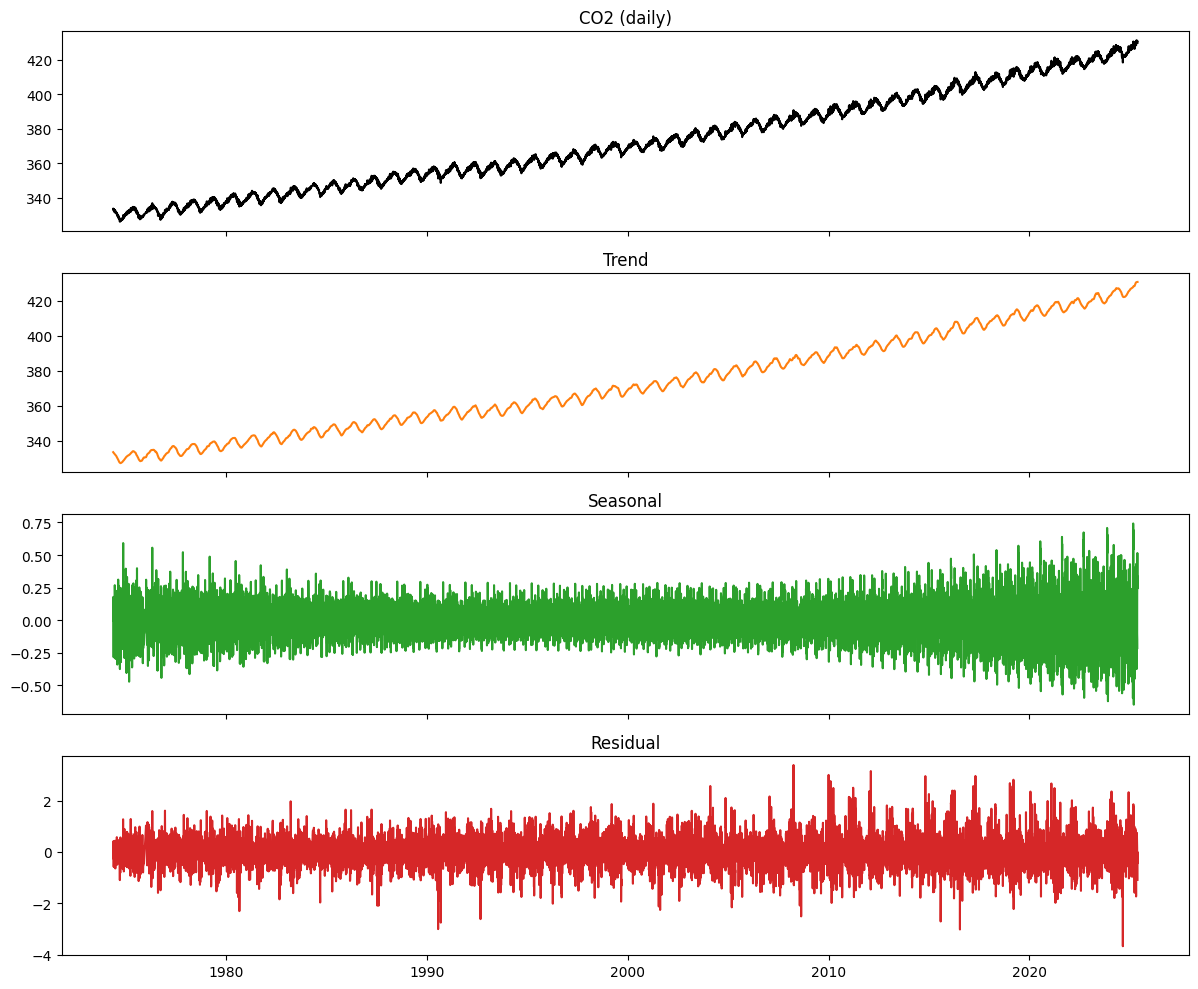

In [5]:
fig, axes = plt.subplots(4,1, figsize=(12,10), sharex=True)
axes[0].plot(y,       color='k'); axes[0].set_title('CO2 (daily)')
axes[1].plot(decomp['trend'],    color='C1'); axes[1].set_title('Trend')
axes[2].plot(decomp['seasonal'], color='C2'); axes[2].set_title('Seasonal')
axes[3].plot(decomp['residual'], color='C3'); axes[3].set_title('Residual')
plt.tight_layout()
plt.show()